**Machine Learning: Code Assignment U3A2**

**Image Segmentation**

Author: Gowtham Iyer

# Loading the image

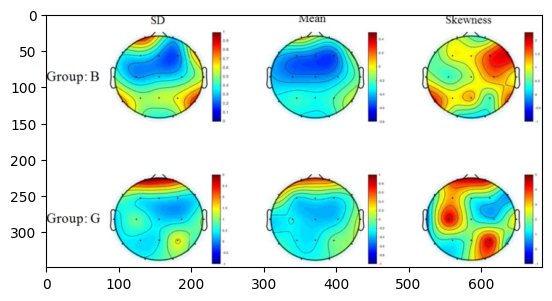

In [68]:
from matplotlib.image import imread
from matplotlib import pyplot as plt
image = imread('/brain_topography_stress_stages.png')
plt.imshow(image)
plt.show()

# Image Segmentation

In [66]:
from cv2 import kmeans, TERM_CRITERIA_MAX_ITER, TERM_CRITERIA_EPS, KMEANS_RANDOM_CENTERS
from numpy import float32, uint8, unique

img_data = image.reshape(-1, 3)

# Defining Termination criteria
termination_crit = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, 10, 1.0)

# k-means clustering
compactness, labels, centers = kmeans(data=img_data.astype(float32), K=4, bestLabels=None, \
                                      criteria=termination_crit, attempts = 20, flags=KMEANS_RANDOM_CENTERS)

# Print Shape of k-mean labels:
print("Shape of k-mean labels: ", labels.shape)

# Print the Cluster Centers
#print("Cluster Centers: \n", centers);

# Apply the RGB values of the cluster centers to all pixel labels
segmented_img = centers[labels].reshape(-1, 3)

# Find the number of unique RGB values
#print(len(unique(segmented_img, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')

# Reshape array to the original image shape
img_colours = segmented_img.reshape(image.shape)

# Display the quantized image
#imshow(img_colours.astype(uint8))
#show()
#plt.imshow(img_colours)
#plt.show()

Shape of k-mean labels:  (239065, 1)
